# SOLAR RADIATION PREDICTION### 

##Calling Libraries that we will use for initial exploration and investigation of data

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
os.chdir("E:\\FORE\\Term 4\\BDDA\\Datasets\\SolarPrediction")

In [3]:
sp = pd.read_csv("SolarPrediction.csv") #First we will explore and read the data 

In [4]:
sp.head() #It gives first five entries of the data 

UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00

In [5]:
sp.info()  ##gives the concise summary of the dataset including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [6]:
sp.describe()  #It gives mathematical description of each column in the data.
#count - The number of not-empty values.
#mean - The average (mean) value.
#std - The standard deviation.
#min - the minimum value.
#25% - The 25% percentile*.
#50% - The 50% percentile*.
#75% - The 75% percentile*.
#max - the maximum value   

UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.478026e+09      2.660000     50.000000     30.430000     85.000000   
75%    1.480480e+09    354.235000     55.000000     30.460000     97.000000   
max    1.483265e+09   1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed  
count            32686.000000  32686.000000  
mean               143.489821      6.243869  
std                 83.167500      3.490474  
min                  0.090000      0.000000  
25%                 82.227500      3.370000  
50%                147.700000      5.620000  
75%                179.310000      7.870000  
max                359.950000     40.500000

In [7]:
sp.shape ## It gives the total number of rows and columns in the dataset

(32686, 11)

In [8]:
sp.size # It gives total number of elements in the dataframe 

359546

In [9]:
sp.nunique()  #gives number of unique values in each column

UNIXTime                  32686
Data                        118
Time                       8299
Radiation                 14434
Temperature                  38
Pressure                     38
Humidity                     94
WindDirection(Degrees)    17951
Speed                        37
TimeSunRise                  51
TimeSunSet                   56
dtype: int64

In [10]:
sp

UNIXTime                   Data      Time  Radiation  Temperature  \
0      1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1      1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2      1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3      1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4      1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   
...           ...                    ...       ...        ...          ...   
32681  1480587604  12/1/2016 12:00:00 AM  00:20:04       1.22           44   
32682  1480587301  12/1/2016 12:00:00 AM  00:15:01       1.17           44   
32683  1480587001  12/1/2016 12:00:00 AM  00:10:01       1.20           44   
32684  1480586702  12/1/2016 12:00:00 AM  00:05:02       1.23           44   
32685  1480586402  12/1/2016 12:00:00 AM  00:00:02       1.20           44   

       Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise  \
0         30.46        59                  177.39   5.62    06:13:00   
1         30.46        58                  176.78   3.37    06:13:00   
2         30.46        57                  158.75   3.37    06:13:00   
3         30.46        60                  137.71   3.37    06:13:00   
4         30.46        62                  104.95   5.62    06:13:00   
...         ...       ...                     ...    ...         ...   
32681     30.43       102                  145.42   6.75    06:41:00   
32682     30.42       102                  117.78   6.75    06:41:00   
32683     30.42       102                  145.19   9.00    06:41:00   
32684     30.42       101                  164.19   7.87    06:41:00   
32685     30.43       101                   83.59   3.37    06:41:00   

      TimeSunSet  
0       18:13:00  
1       18:13:00  
2       18:13:00  
3       18:13:00  
4       18:13:00  
...          ...  
32681   17:42:00  
32682   17:42:00  
32683   17:42:00  
32684   17:42:00  
32685   17:42:00  

[32686 rows x 11 columns]

In [11]:
import datetime
from datetime import datetime 
 #Date Time used to have date time Dtype in our pandas dataframe

In [12]:
sp['Time'].astype('str') #Converting to string for it to be readable to the datetime module

0        23:55:26
1        23:50:23
2        23:45:26
3        23:40:21
4        23:35:24
           ...   
32681    00:20:04
32682    00:15:01
32683    00:10:01
32684    00:05:02
32685    00:00:02
Name: Time, Length: 32686, dtype: object

In [13]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [14]:
sp['Time'] = pd.to_datetime(sp['Time'], format='%H:%M:%S') 

#this function converts a scalar, array-like, Series or DataFrame/dict-like to a pandas datetime object.

In [15]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   UNIXTime                32686 non-null  int64         
 1   Data                    32686 non-null  object        
 2   Time                    32686 non-null  datetime64[ns]
 3   Radiation               32686 non-null  float64       
 4   Temperature             32686 non-null  int64         
 5   Pressure                32686 non-null  float64       
 6   Humidity                32686 non-null  int64         
 7   WindDirection(Degrees)  32686 non-null  float64       
 8   Speed                   32686 non-null  float64       
 9   TimeSunRise             32686 non-null  object        
 10  TimeSunSet              32686 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 2.7+ MB


In [16]:
sp["Hour of Day"] = sp["Time"].dt.hour #Creating Hour of the Day to further investigate the measures available to us

In [17]:
sp.head()

UNIXTime                   Data                Time  Radiation  \
0  1475229326  9/29/2016 12:00:00 AM 1900-01-01 23:55:26       1.21   
1  1475229023  9/29/2016 12:00:00 AM 1900-01-01 23:50:23       1.21   
2  1475228726  9/29/2016 12:00:00 AM 1900-01-01 23:45:26       1.23   
3  1475228421  9/29/2016 12:00:00 AM 1900-01-01 23:40:21       1.21   
4  1475228124  9/29/2016 12:00:00 AM 1900-01-01 23:35:24       1.17   

   Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise  \
0           48     30.46        59                  177.39   5.62    06:13:00   
1           48     30.46        58                  176.78   3.37    06:13:00   
2           48     30.46        57                  158.75   3.37    06:13:00   
3           48     30.46        60                  137.71   3.37    06:13:00   
4           48     30.46        62                  104.95   5.62    06:13:00   

  TimeSunSet  Hour of Day  
0   18:13:00           23  
1   18:13:00           23  
2   18:13:00           23  
3   18:13:00           23  
4   18:13:00           23

In [18]:
sp['TimeSunRise'] = pd.to_datetime(sp['TimeSunRise'], format='%H:%M:%S') 

In [19]:
sp['TimeSunSet'] = pd.to_datetime(sp['TimeSunSet'], format='%H:%M:%S') #converted to datetime Dtype

In [20]:
sp.head()

UNIXTime                   Data                Time  Radiation  \
0  1475229326  9/29/2016 12:00:00 AM 1900-01-01 23:55:26       1.21   
1  1475229023  9/29/2016 12:00:00 AM 1900-01-01 23:50:23       1.21   
2  1475228726  9/29/2016 12:00:00 AM 1900-01-01 23:45:26       1.23   
3  1475228421  9/29/2016 12:00:00 AM 1900-01-01 23:40:21       1.21   
4  1475228124  9/29/2016 12:00:00 AM 1900-01-01 23:35:24       1.17   

   Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0           48     30.46        59                  177.39   5.62   
1           48     30.46        58                  176.78   3.37   
2           48     30.46        57                  158.75   3.37   
3           48     30.46        60                  137.71   3.37   
4           48     30.46        62                  104.95   5.62   

          TimeSunRise          TimeSunSet  Hour of Day  
0 1900-01-01 06:13:00 1900-01-01 18:13:00           23  
1 1900-01-01 06:13:00 1900-01-01 18:13:00           23  
2 1900-01-01 06:13:00 1900-01-01 18:13:00           23  
3 1900-01-01 06:13:00 1900-01-01 18:13:00           23  
4 1900-01-01 06:13:00 1900-01-01 18:13:00           23

In [21]:
sp.info() #can see the new Dtypes we created

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   UNIXTime                32686 non-null  int64         
 1   Data                    32686 non-null  object        
 2   Time                    32686 non-null  datetime64[ns]
 3   Radiation               32686 non-null  float64       
 4   Temperature             32686 non-null  int64         
 5   Pressure                32686 non-null  float64       
 6   Humidity                32686 non-null  int64         
 7   WindDirection(Degrees)  32686 non-null  float64       
 8   Speed                   32686 non-null  float64       
 9   TimeSunRise             32686 non-null  datetime64[ns]
 10  TimeSunSet              32686 non-null  datetime64[ns]
 11  Hour of Day             32686 non-null  int64         
dtypes: datetime64[ns](3), float64(4), int64(4), ob

# We see that most Radiation observations are in the first bin

<Figure size 2160x648 with 0 Axes>

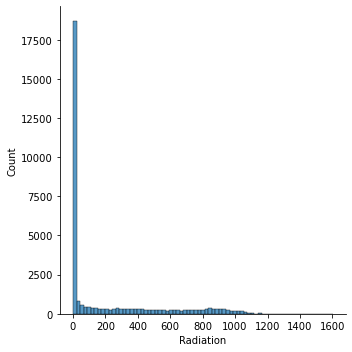

In [22]:
plt.figure(figsize = (30,9))
_=sns.displot(sp["Radiation"])
#We have plotted distribution plot for the column Radiation. 
# Count ranges from 0 to 1600

## Setting limit to the X- axis so that the we understand the distribution better 

(0.0, 150.0)

<Figure size 2160x648 with 0 Axes>

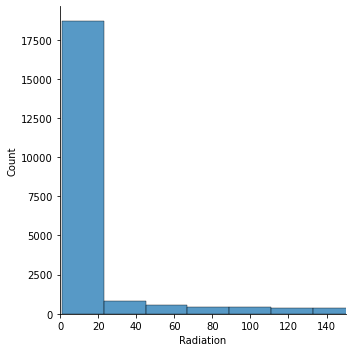

In [23]:
plt.figure(figsize = (30,9))
_=sns.displot(sp["Radiation"])
plt.xlim(0, 150)
#Maximum count of radiation is seen in the interval 0-20.
#It gives better understanding than the last. 

(0.0, 1000.0)

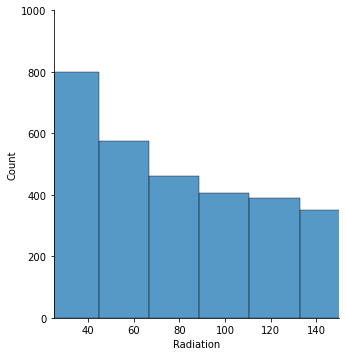

In [24]:

_=sns.displot(sp["Radiation"])
plt.xlim(25, 150)
plt.ylim(0, 1000)
# Here we have specified the scale for both x and y axis.
#We are now able to see distribution count of higher radiation in a more comprehensive manner

(0.0, 400.0)

<Figure size 1800x1368 with 0 Axes>

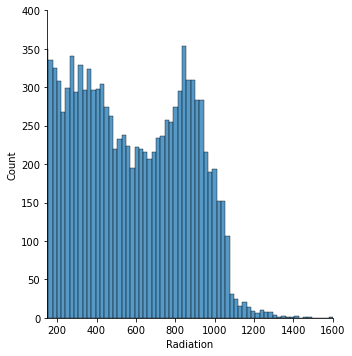

In [25]:
plt.figure(figsize = (25,19))
_=sns.displot(sp["Radiation"])
plt.xlim(150, 1600)
plt.ylim(0, 400)



In [26]:
sp['HS'] = sp['Hour of Day'].astype('str')


(25.0, 400.0)

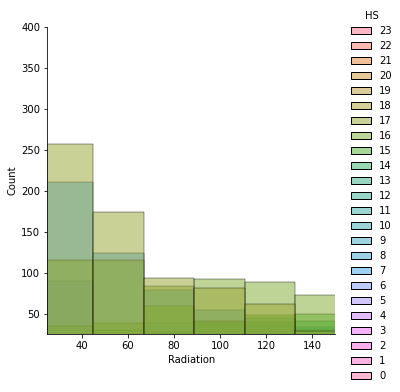

In [27]:
_=sns.displot(x = sp["Radiation"],hue =  sp["HS"] , data = sp)
plt.xlim(25, 150)
plt.ylim(25, 400)
#Inserting the Hour of the day to understand the distribution of radiation levels according to time 

(0.0, 1000.0)

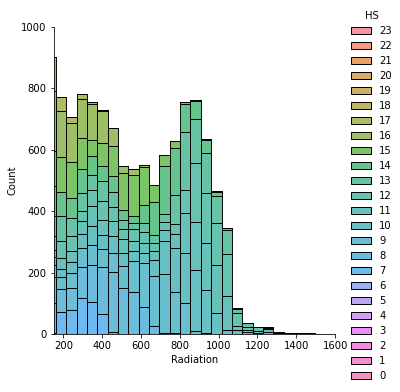

In [28]:

_=sns.displot(x = sp["Radiation"],hue=  sp["HS"] ,  multiple = "stack", data = sp, bins= 30)
plt.xlim(150, 1600)
plt.ylim(0, 1000)
##Count and the Hours where we see maximum solar radiation

<AxesSubplot:xlabel='HS', ylabel='Radiation'>

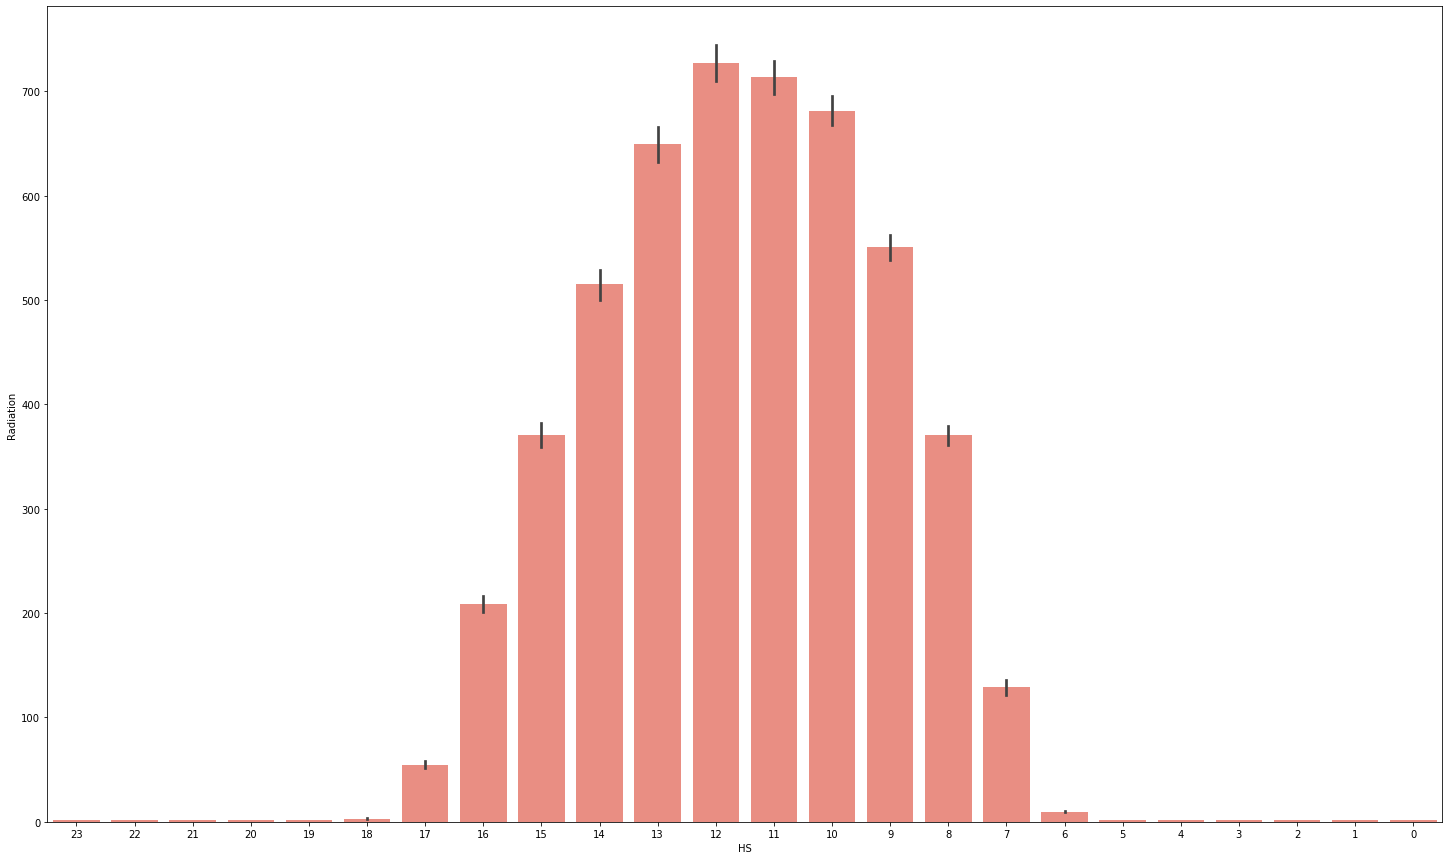

In [29]:
plt.figure(figsize = (25,15))
sns.barplot(x="HS", y="Radiation", data=sp, color = "salmon")
#the average radiation received increases till the 12th hour and then goes down (read right to left) 

In [30]:
bins = [-1, 5, 8, 14, 18, 24]
names = ['12AM-6AM', '6AM-9AM', '9AM-3PM','3PM-7PM' ,'7PM-11:59PM']
sp['Hour Category'] = pd.cut(sp['Hour of Day'], bins, labels=names)
#we have created bins and ctegorized hour of the day into 5 different categories or bins. 

In [31]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   UNIXTime                32686 non-null  int64         
 1   Data                    32686 non-null  object        
 2   Time                    32686 non-null  datetime64[ns]
 3   Radiation               32686 non-null  float64       
 4   Temperature             32686 non-null  int64         
 5   Pressure                32686 non-null  float64       
 6   Humidity                32686 non-null  int64         
 7   WindDirection(Degrees)  32686 non-null  float64       
 8   Speed                   32686 non-null  float64       
 9   TimeSunRise             32686 non-null  datetime64[ns]
 10  TimeSunSet              32686 non-null  datetime64[ns]
 11  Hour of Day             32686 non-null  int64         
 12  HS                      32686 non-null  object

In [32]:
sp.shape

(32686, 14)

## Understanding the other variables in the dataset

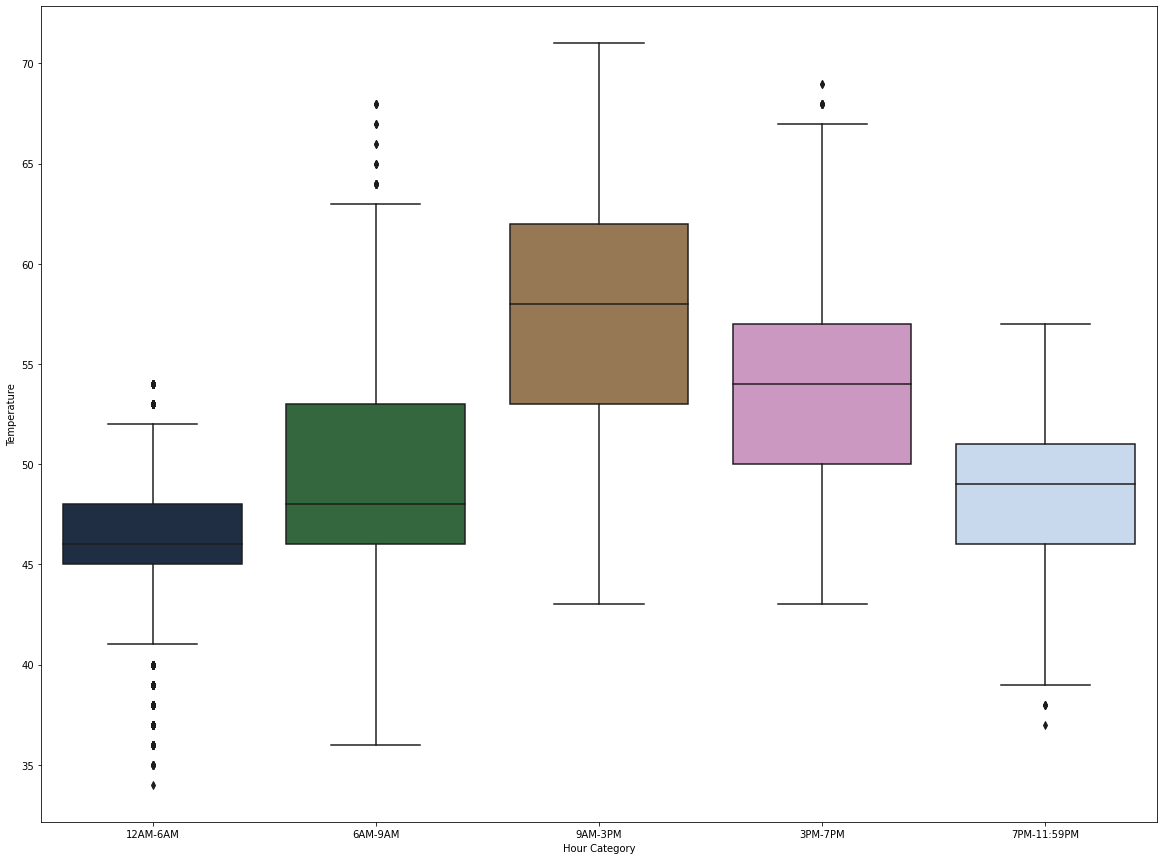

In [33]:
plt.figure(figsize = (20,15))
_=sns.boxplot(x="Hour Category", y= "Temperature",data=sp, palette = "cubehelix" )


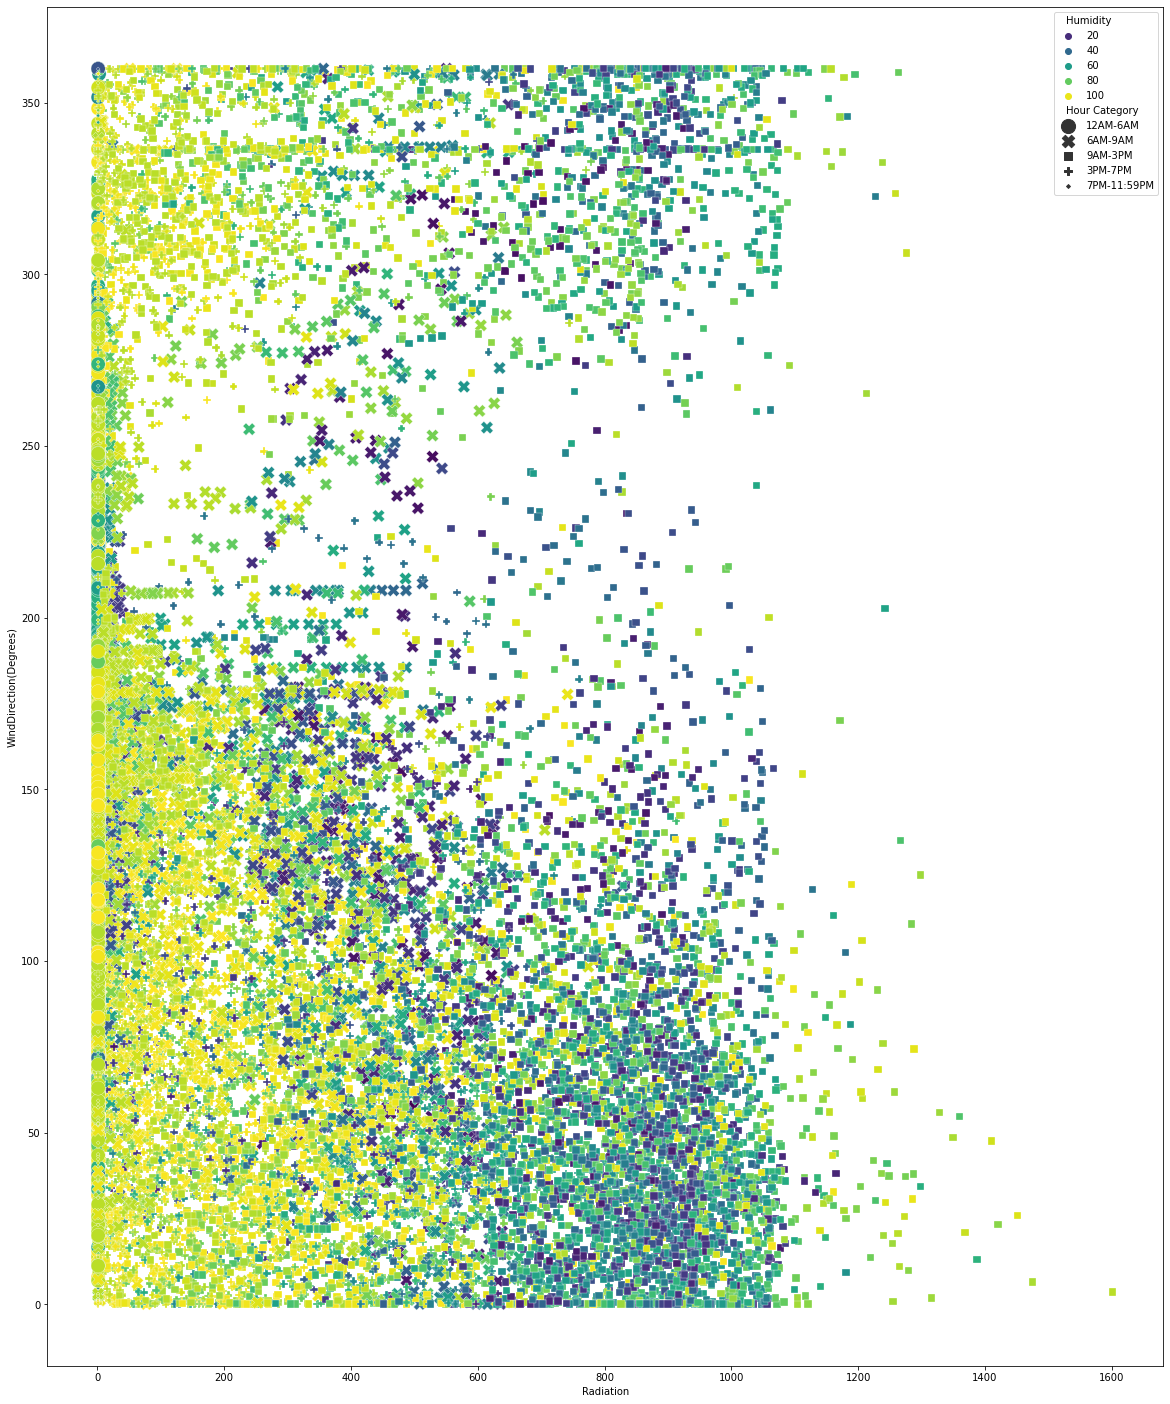

In [34]:
plt.figure(figsize = (20,25))

_=sns.scatterplot(x = "Radiation", y= "WindDirection(Degrees)", hue = "Humidity",size= "Hour Category", 
                  style= "Hour Category", sizes = (15,200),
                   data= sp,palette = "viridis")

##We can see that Higher Radiation is observed at lower levels of Humidity

In [35]:
sp.head()

UNIXTime                   Data                Time  Radiation  \
0  1475229326  9/29/2016 12:00:00 AM 1900-01-01 23:55:26       1.21   
1  1475229023  9/29/2016 12:00:00 AM 1900-01-01 23:50:23       1.21   
2  1475228726  9/29/2016 12:00:00 AM 1900-01-01 23:45:26       1.23   
3  1475228421  9/29/2016 12:00:00 AM 1900-01-01 23:40:21       1.21   
4  1475228124  9/29/2016 12:00:00 AM 1900-01-01 23:35:24       1.17   

   Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0           48     30.46        59                  177.39   5.62   
1           48     30.46        58                  176.78   3.37   
2           48     30.46        57                  158.75   3.37   
3           48     30.46        60                  137.71   3.37   
4           48     30.46        62                  104.95   5.62   

          TimeSunRise          TimeSunSet  Hour of Day  HS Hour Category  
0 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM  
1 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM  
2 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM  
3 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM  
4 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM

In [36]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   UNIXTime                32686 non-null  int64         
 1   Data                    32686 non-null  object        
 2   Time                    32686 non-null  datetime64[ns]
 3   Radiation               32686 non-null  float64       
 4   Temperature             32686 non-null  int64         
 5   Pressure                32686 non-null  float64       
 6   Humidity                32686 non-null  int64         
 7   WindDirection(Degrees)  32686 non-null  float64       
 8   Speed                   32686 non-null  float64       
 9   TimeSunRise             32686 non-null  datetime64[ns]
 10  TimeSunSet              32686 non-null  datetime64[ns]
 11  Hour of Day             32686 non-null  int64         
 12  HS                      32686 non-null  object

In [37]:
sp["Time of Observation"] = pd.to_datetime(sp['UNIXTime'],unit='s') 

#To see what time frame the observations are for

In [38]:
sp.head()

UNIXTime                   Data                Time  Radiation  \
0  1475229326  9/29/2016 12:00:00 AM 1900-01-01 23:55:26       1.21   
1  1475229023  9/29/2016 12:00:00 AM 1900-01-01 23:50:23       1.21   
2  1475228726  9/29/2016 12:00:00 AM 1900-01-01 23:45:26       1.23   
3  1475228421  9/29/2016 12:00:00 AM 1900-01-01 23:40:21       1.21   
4  1475228124  9/29/2016 12:00:00 AM 1900-01-01 23:35:24       1.17   

   Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0           48     30.46        59                  177.39   5.62   
1           48     30.46        58                  176.78   3.37   
2           48     30.46        57                  158.75   3.37   
3           48     30.46        60                  137.71   3.37   
4           48     30.46        62                  104.95   5.62   

          TimeSunRise          TimeSunSet  Hour of Day  HS Hour Category  \
0 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
1 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
2 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
3 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
4 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   

  Time of Observation  
0 2016-09-30 09:55:26  
1 2016-09-30 09:50:23  
2 2016-09-30 09:45:26  
3 2016-09-30 09:40:21  
4 2016-09-30 09:35:24

In [39]:
sp["Month"] = sp["Time of Observation"].dt.month_name()
#adds a new column month for easy understanding

In [40]:
sp.head()

UNIXTime                   Data                Time  Radiation  \
0  1475229326  9/29/2016 12:00:00 AM 1900-01-01 23:55:26       1.21   
1  1475229023  9/29/2016 12:00:00 AM 1900-01-01 23:50:23       1.21   
2  1475228726  9/29/2016 12:00:00 AM 1900-01-01 23:45:26       1.23   
3  1475228421  9/29/2016 12:00:00 AM 1900-01-01 23:40:21       1.21   
4  1475228124  9/29/2016 12:00:00 AM 1900-01-01 23:35:24       1.17   

   Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0           48     30.46        59                  177.39   5.62   
1           48     30.46        58                  176.78   3.37   
2           48     30.46        57                  158.75   3.37   
3           48     30.46        60                  137.71   3.37   
4           48     30.46        62                  104.95   5.62   

          TimeSunRise          TimeSunSet  Hour of Day  HS Hour Category  \
0 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
1 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
2 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
3 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
4 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   

  Time of Observation      Month  
0 2016-09-30 09:55:26  September  
1 2016-09-30 09:50:23  September  
2 2016-09-30 09:45:26  September  
3 2016-09-30 09:40:21  September  
4 2016-09-30 09:35:24  September

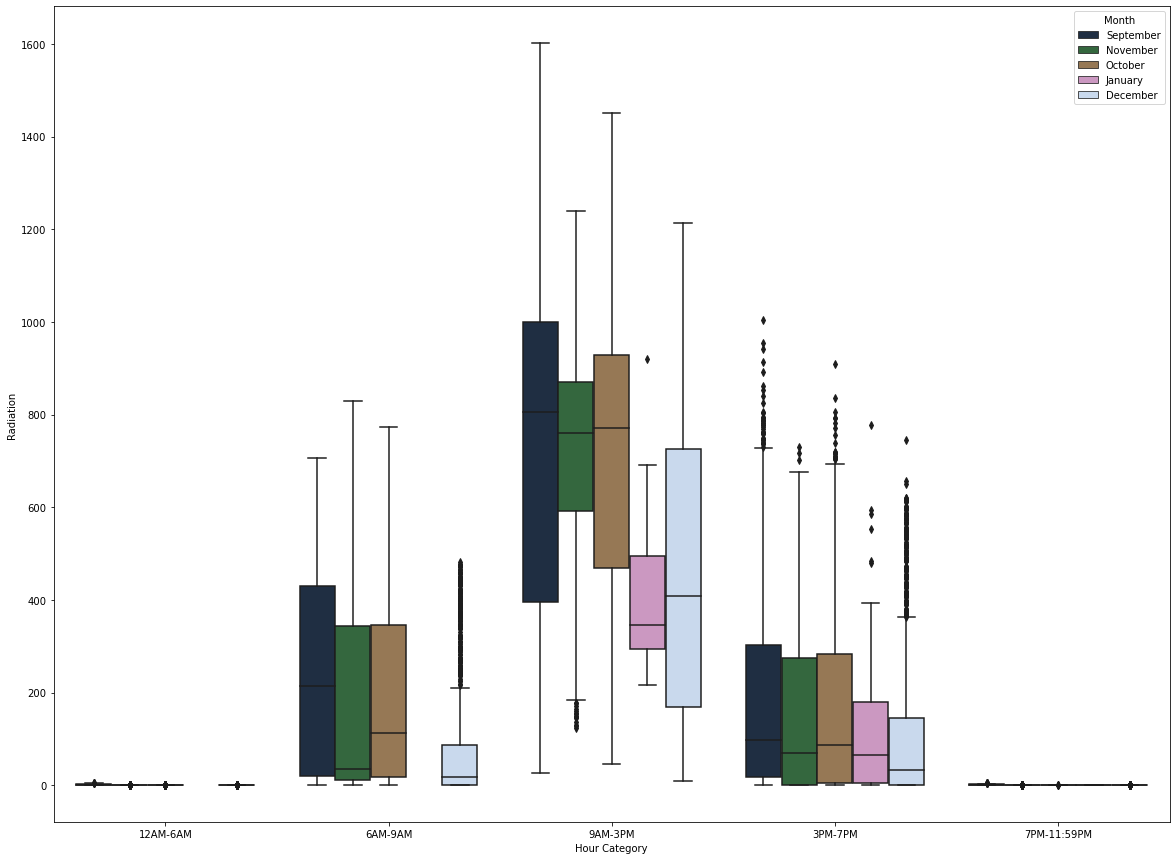

In [41]:
plt.figure(figsize = (20,15))
_=sns.boxplot(x="Hour Category", y= "Radiation",hue="Month",data=sp, palette = "cubehelix" )

#Here we observe that the highest solar radiation is in the month of September, and in between 9 AM to 3 PM

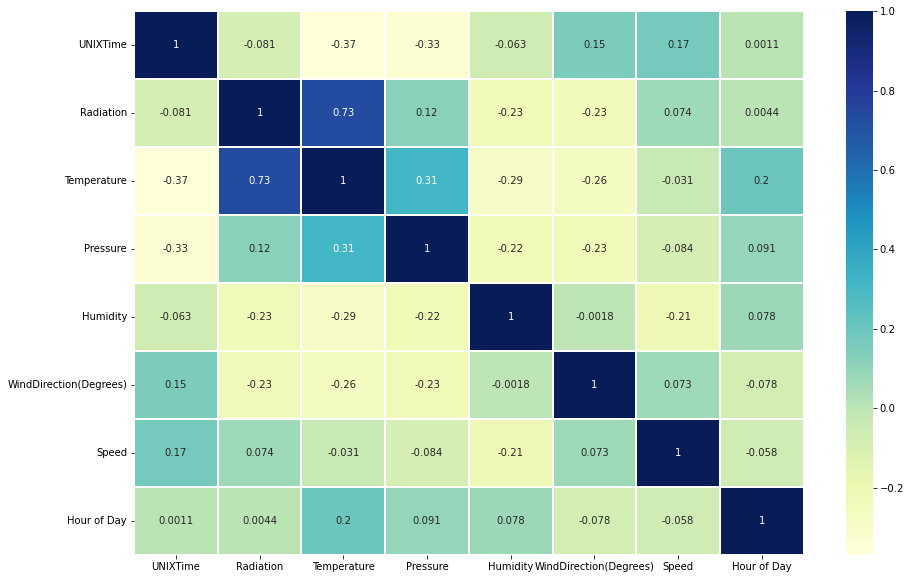

In [42]:
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(sp.corr(), annot=True, linewidths=.05, cmap="YlGnBu",ax=ax)
plt.show() 
#heat map showing the relationship among various parameters of the dataset 
#here we can see that radiation and temperature are closely related 

<AxesSubplot:xlabel='Month', ylabel='Radiation'>

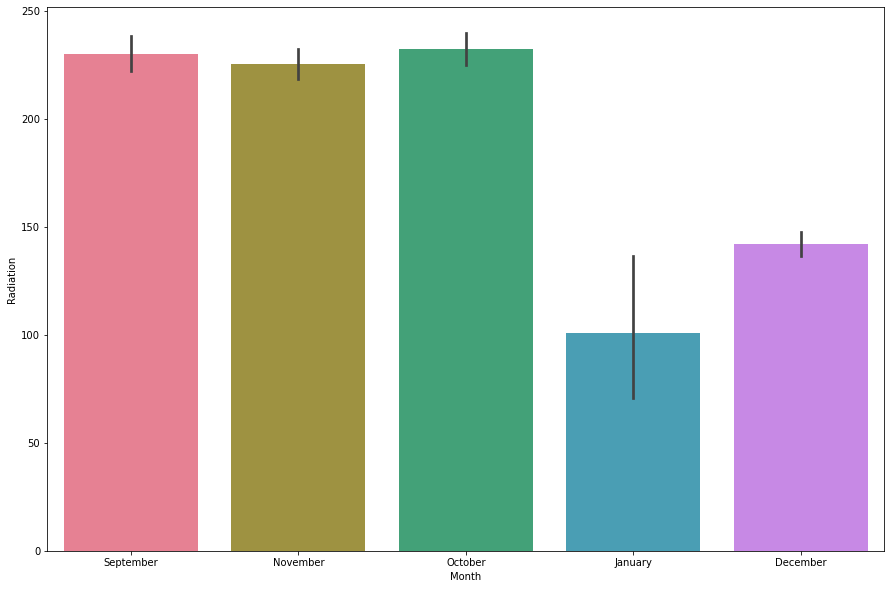

In [43]:
plt.figure(figsize = (15,10))
sns.barplot(x="Month", y="Radiation", data=sp, palette="husl")
#Average Radiation each month 


In [44]:
sp.head()

UNIXTime                   Data                Time  Radiation  \
0  1475229326  9/29/2016 12:00:00 AM 1900-01-01 23:55:26       1.21   
1  1475229023  9/29/2016 12:00:00 AM 1900-01-01 23:50:23       1.21   
2  1475228726  9/29/2016 12:00:00 AM 1900-01-01 23:45:26       1.23   
3  1475228421  9/29/2016 12:00:00 AM 1900-01-01 23:40:21       1.21   
4  1475228124  9/29/2016 12:00:00 AM 1900-01-01 23:35:24       1.17   

   Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0           48     30.46        59                  177.39   5.62   
1           48     30.46        58                  176.78   3.37   
2           48     30.46        57                  158.75   3.37   
3           48     30.46        60                  137.71   3.37   
4           48     30.46        62                  104.95   5.62   

          TimeSunRise          TimeSunSet  Hour of Day  HS Hour Category  \
0 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
1 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
2 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
3 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
4 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   

  Time of Observation      Month  
0 2016-09-30 09:55:26  September  
1 2016-09-30 09:50:23  September  
2 2016-09-30 09:45:26  September  
3 2016-09-30 09:40:21  September  
4 2016-09-30 09:35:24  September

In [45]:
sp2 = sp[["Month", "Radiation", "Hour of Day"]]
#we take only these three columns in the datset for further visualization

In [46]:
sp2 = sp2.pivot_table(index = 'Hour of Day', columns = 'Month', values = 'Radiation')
#creating pivot table to be converted to heatmap

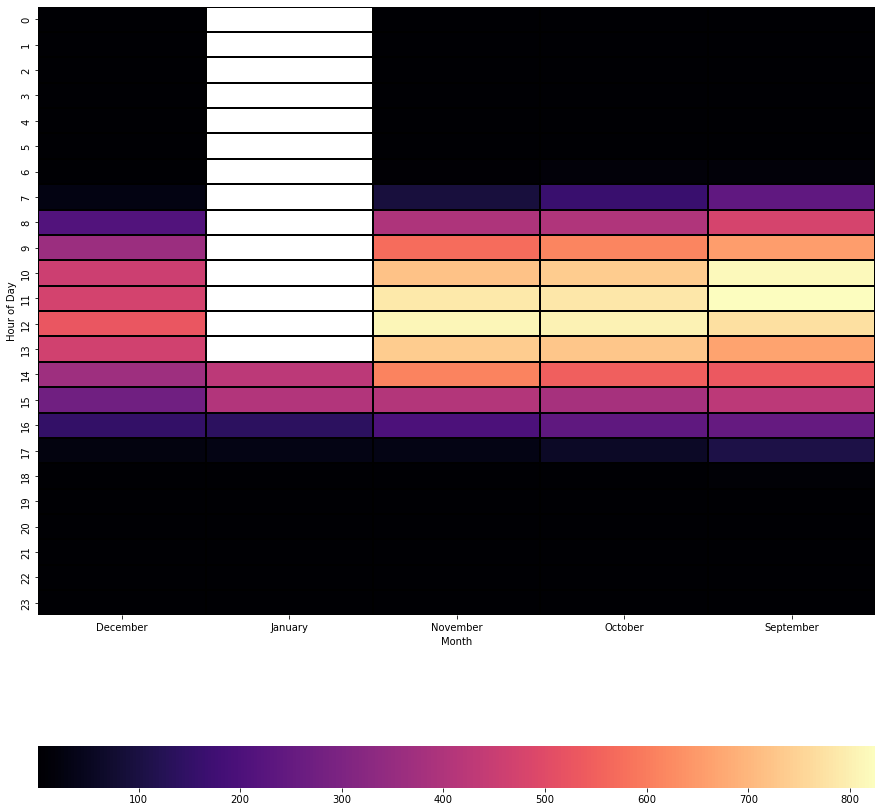

In [47]:
plt.figure(figsize = (15,16))
_=sns.heatmap(sp2, cmap="magma",linewidth = "0.005",linecolor ="black",cbar_kws={"orientation": "horizontal"})
#Shows the distribution of solar radiation over the hours per month

In [48]:
sp

UNIXTime                   Data                Time  Radiation  \
0      1475229326  9/29/2016 12:00:00 AM 1900-01-01 23:55:26       1.21   
1      1475229023  9/29/2016 12:00:00 AM 1900-01-01 23:50:23       1.21   
2      1475228726  9/29/2016 12:00:00 AM 1900-01-01 23:45:26       1.23   
3      1475228421  9/29/2016 12:00:00 AM 1900-01-01 23:40:21       1.21   
4      1475228124  9/29/2016 12:00:00 AM 1900-01-01 23:35:24       1.17   
...           ...                    ...                 ...        ...   
32681  1480587604  12/1/2016 12:00:00 AM 1900-01-01 00:20:04       1.22   
32682  1480587301  12/1/2016 12:00:00 AM 1900-01-01 00:15:01       1.17   
32683  1480587001  12/1/2016 12:00:00 AM 1900-01-01 00:10:01       1.20   
32684  1480586702  12/1/2016 12:00:00 AM 1900-01-01 00:05:02       1.23   
32685  1480586402  12/1/2016 12:00:00 AM 1900-01-01 00:00:02       1.20   

       Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0               48     30.46        59                  177.39   5.62   
1               48     30.46        58                  176.78   3.37   
2               48     30.46        57                  158.75   3.37   
3               48     30.46        60                  137.71   3.37   
4               48     30.46        62                  104.95   5.62   
...            ...       ...       ...                     ...    ...   
32681           44     30.43       102                  145.42   6.75   
32682           44     30.42       102                  117.78   6.75   
32683           44     30.42       102                  145.19   9.00   
32684           44     30.42       101                  164.19   7.87   
32685           44     30.43       101                   83.59   3.37   

              TimeSunRise          TimeSunSet  Hour of Day  HS Hour Category  \
0     1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
1     1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
2     1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
3     1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
4     1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
...                   ...                 ...          ...  ..           ...   
32681 1900-01-01 06:41:00 1900-01-01 17:42:00            0   0      12AM-6AM   
32682 1900-01-01 06:41:00 1900-01-01 17:42:00            0   0      12AM-6AM   
32683 1900-01-01 06:41:00 1900-01-01 17:42:00            0   0      12AM-6AM   
32684 1900-01-01 06:41:00 1900-01-01 17:42:00            0   0      12AM-6AM   
32685 1900-01-01 06:41:00 1900-01-01 17:42:00            0   0      12AM-6AM   

      Time of Observation      Month  
0     2016-09-30 09:55:26  September  
1     2016-09-30 09:50:23  September  
2     2016-09-30 09:45:26  September  
3     2016-09-30 09:40:21  September  
4     2016-09-30 09:35:24  September  
...                   ...        ...  
32681 2016-12-01 10:20:04   December  
32682 2016-12-01 10:15:01   December  
32683 2016-12-01 10:10:01   December  
32684 2016-12-01 10:05:02   December  
32685 2016-12-01 10:00:02   December  

[32686 rows x 16 columns]

In [49]:
sp3 = sp[["Month", "Pressure", "Hour of Day"]]

In [50]:
sp4 = sp[["Month", "Humidity", "Hour Category"]]

In [51]:
sp3 = sp3.pivot_table(index = 'Hour of Day', columns = 'Month', values = 'Pressure')

In [52]:
sp4 = sp4.pivot_table(index = 'Month', columns = 'Hour Category', values = 'Humidity')

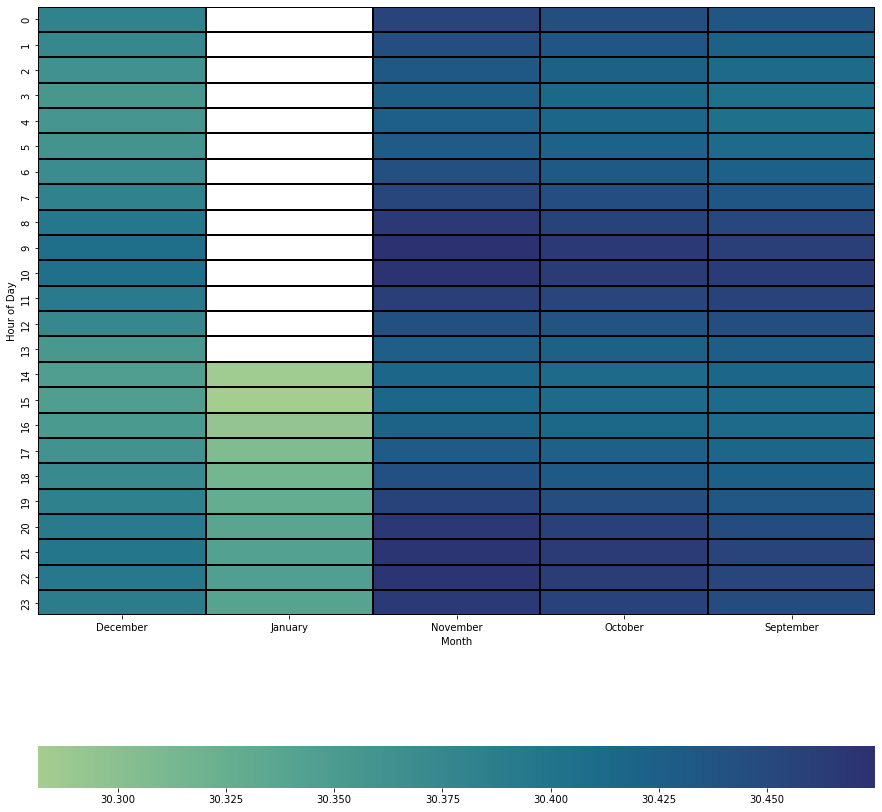

In [53]:
plt.figure(figsize = (15,16))
_=sns.heatmap(sp3, cmap="crest",linewidth = "0.005",linecolor ="black",cbar_kws={"orientation": "horizontal"})
#lowest pressure is also seen in the month of january   

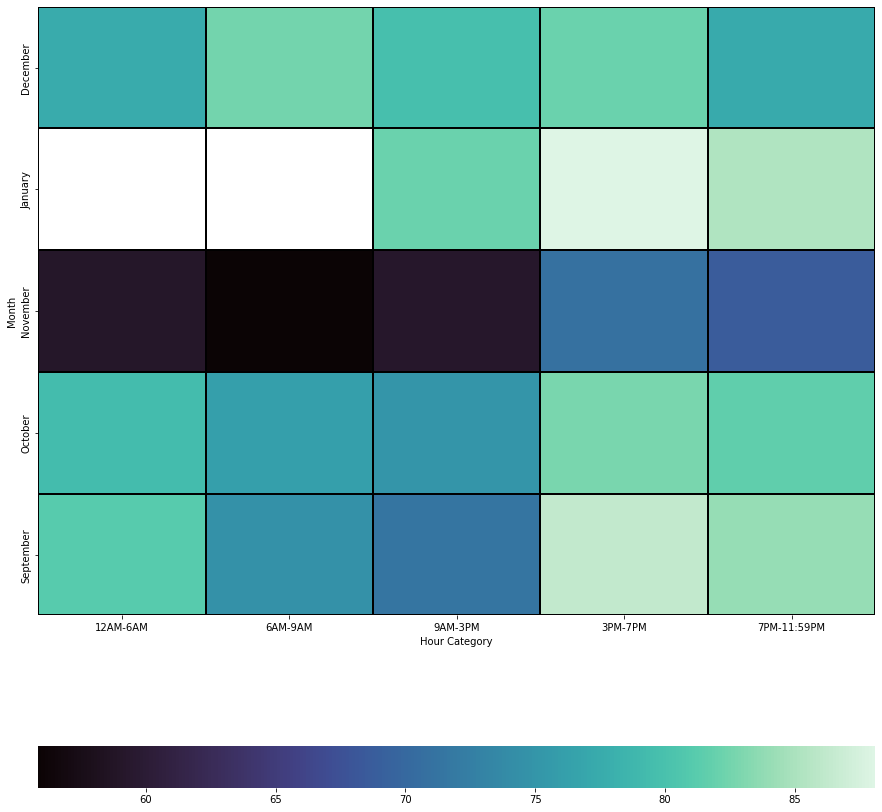

In [54]:
plt.figure(figsize = (15,16))
_=sns.heatmap(sp4, cmap="mako",linewidth = "0.005",linecolor ="black",cbar_kws={"orientation": "horizontal"})
#Highest pressure is seen in the month of november at 6am-9am category

E:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


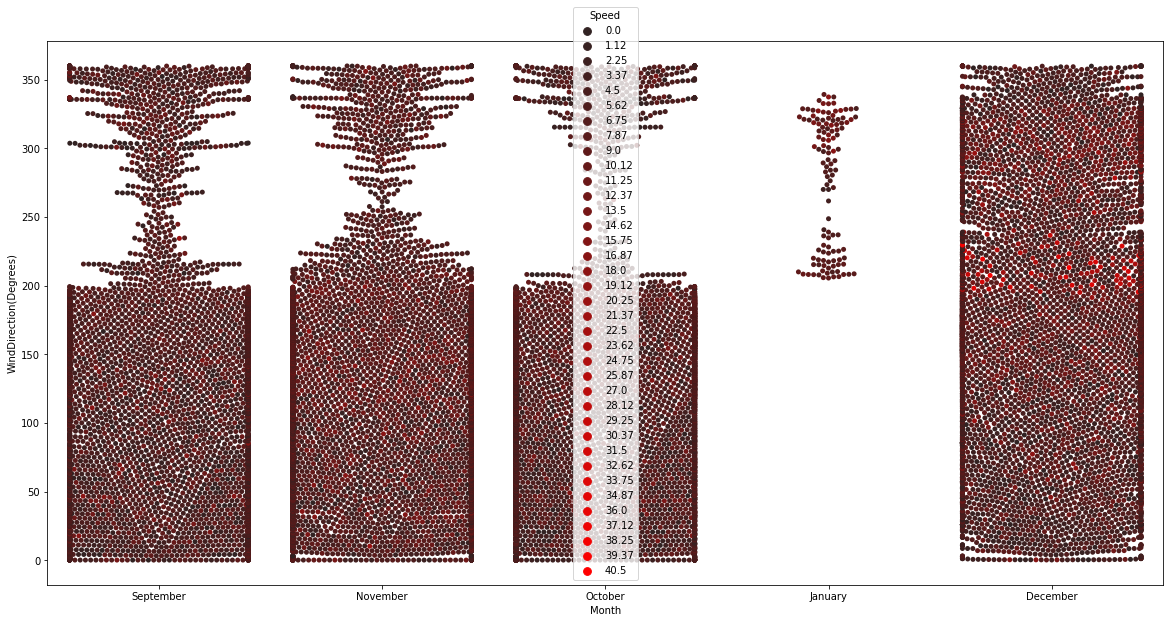

In [55]:
plt.figure(figsize = (20,10))
_=sns.swarmplot(x="Month", y= "WindDirection(Degrees)", data=sp, hue="Speed",color ='r')

In [56]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   UNIXTime                32686 non-null  int64         
 1   Data                    32686 non-null  object        
 2   Time                    32686 non-null  datetime64[ns]
 3   Radiation               32686 non-null  float64       
 4   Temperature             32686 non-null  int64         
 5   Pressure                32686 non-null  float64       
 6   Humidity                32686 non-null  int64         
 7   WindDirection(Degrees)  32686 non-null  float64       
 8   Speed                   32686 non-null  float64       
 9   TimeSunRise             32686 non-null  datetime64[ns]
 10  TimeSunSet              32686 non-null  datetime64[ns]
 11  Hour of Day             32686 non-null  int64         
 12  HS                      32686 non-null  object

<AxesSubplot:xlabel='Hour of Day', ylabel='Humidity'>

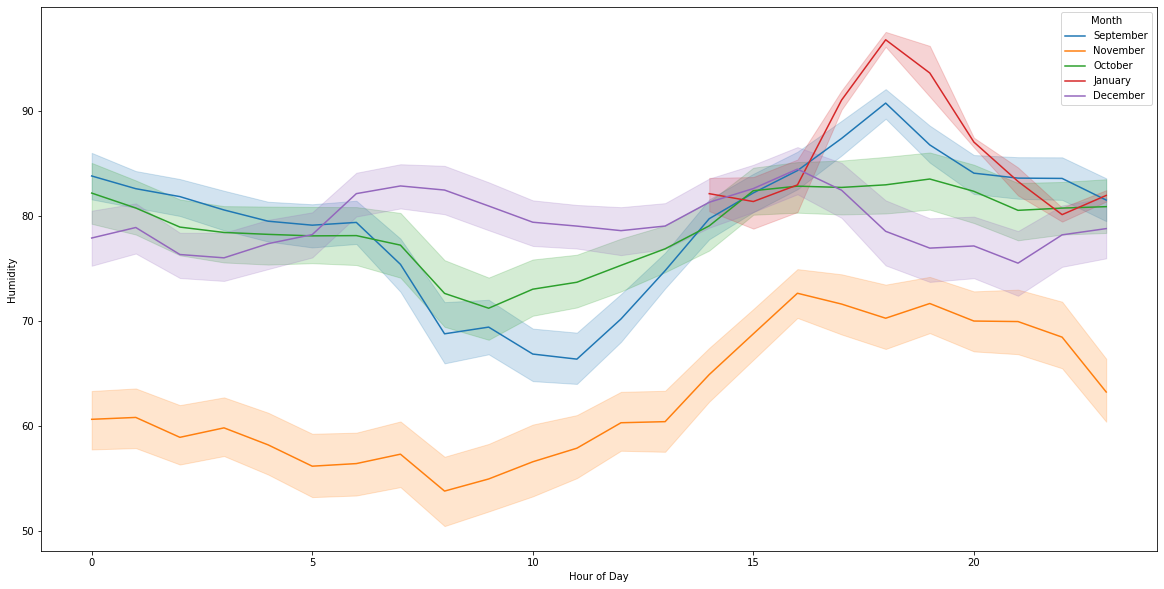

In [57]:
plt.figure(figsize = (20,10))
sns.lineplot(data=sp, x="Hour of Day", y="Humidity", hue="Month")
#Humidity is higher in the month of January at 18th hour of the day. and lowest for November 

<AxesSubplot:xlabel='Hour of Day', ylabel='Pressure'>

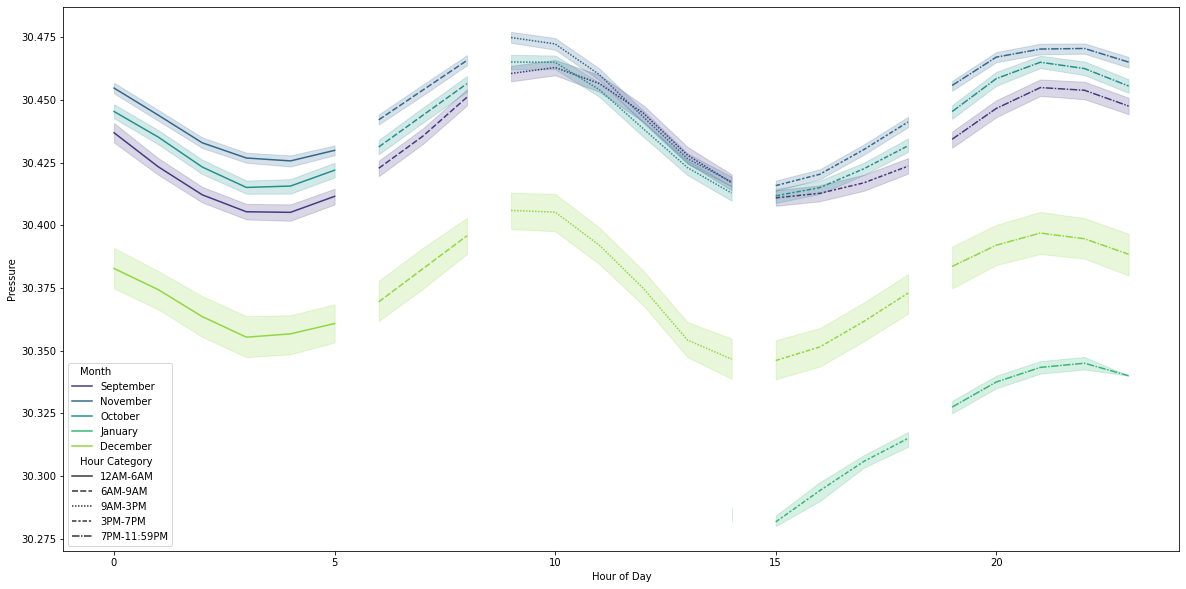

In [58]:
plt.figure(figsize = (20,10))
sns.lineplot(data=sp, x="Hour of Day", y="Pressure", hue="Month", style = "Hour Category", palette = "viridis" )

<AxesSubplot:xlabel='Hour of Day', ylabel='Temperature'>

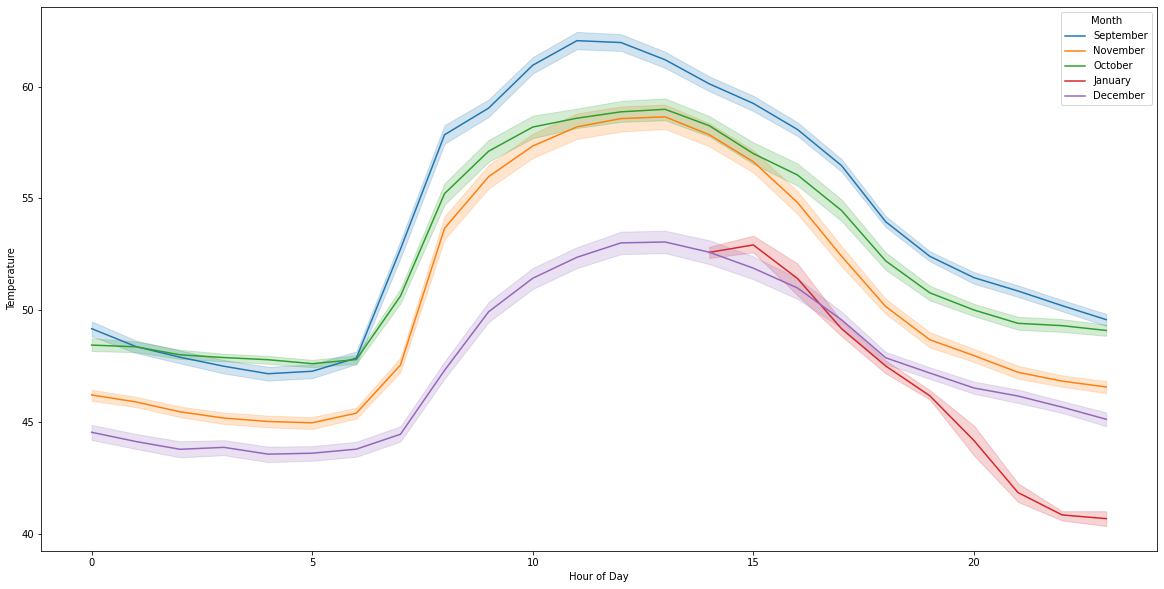

In [59]:
plt.figure(figsize = (20,10))
sns.lineplot(data=sp, x="Hour of Day", y="Temperature", hue="Month")
# we can see that temperature is always high in the month of September and highest at 12th hour of the day. 

# Loading packages to be used to understand data structure, and predict using different algorithms, and also using pipelines to normalize and run algorithms

In [60]:


# 1.2 Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7.1
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

# 1.8 Modeling modules
#     Call sklearn wrapper of xgboost
# """Scikit-Learn Wrapper interface for XGBoost."""
#  """Implementation of the Scikit-Learn API for XGBoost.
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
# Stackoverflow:
# https://stackoverflow.com/a/34696477
# https://stackoverflow.com/a/46947191
# Install as: conda install -c anaconda py-xgboost
from xgboost.sklearn import XGBClassifier

E:\Anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [61]:
# 1.9 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# 1.10
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# 1.11 Permutation feature importance
from sklearn.inspection import permutation_importance

In [62]:
import time
import os
import gc
import random

# 1.13 Used in Randomized parameter search
from scipy.stats import uniform

In [63]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [64]:
sp.head()

UNIXTime                   Data                Time  Radiation  \
0  1475229326  9/29/2016 12:00:00 AM 1900-01-01 23:55:26       1.21   
1  1475229023  9/29/2016 12:00:00 AM 1900-01-01 23:50:23       1.21   
2  1475228726  9/29/2016 12:00:00 AM 1900-01-01 23:45:26       1.23   
3  1475228421  9/29/2016 12:00:00 AM 1900-01-01 23:40:21       1.21   
4  1475228124  9/29/2016 12:00:00 AM 1900-01-01 23:35:24       1.17   

   Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0           48     30.46        59                  177.39   5.62   
1           48     30.46        58                  176.78   3.37   
2           48     30.46        57                  158.75   3.37   
3           48     30.46        60                  137.71   3.37   
4           48     30.46        62                  104.95   5.62   

          TimeSunRise          TimeSunSet  Hour of Day  HS Hour Category  \
0 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
1 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
2 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
3 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
4 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   

  Time of Observation      Month  
0 2016-09-30 09:55:26  September  
1 2016-09-30 09:50:23  September  
2 2016-09-30 09:45:26  September  
3 2016-09-30 09:40:21  September  
4 2016-09-30 09:35:24  September

In [65]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   UNIXTime                32686 non-null  int64         
 1   Data                    32686 non-null  object        
 2   Time                    32686 non-null  datetime64[ns]
 3   Radiation               32686 non-null  float64       
 4   Temperature             32686 non-null  int64         
 5   Pressure                32686 non-null  float64       
 6   Humidity                32686 non-null  int64         
 7   WindDirection(Degrees)  32686 non-null  float64       
 8   Speed                   32686 non-null  float64       
 9   TimeSunRise             32686 non-null  datetime64[ns]
 10  TimeSunSet              32686 non-null  datetime64[ns]
 11  Hour of Day             32686 non-null  int64         
 12  HS                      32686 non-null  object

In [66]:
sp7 = sp.drop(sp.columns[[0, 1, 2,9,10,12,14]] , axis=1)

In [67]:
sp7.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   Hour of Day Hour Category      Month  
0           23   7PM-11:59PM  September  
1           23   7PM-11:59PM  September  
2           23   7PM-11:59PM  September  
3           23   7PM-11:59PM  September  
4           23   7PM-11:59PM  September

In [68]:
y = sp7["Radiation"]

In [69]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


In [70]:
sp7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Radiation               32686 non-null  float64 
 1   Temperature             32686 non-null  int64   
 2   Pressure                32686 non-null  float64 
 3   Humidity                32686 non-null  int64   
 4   WindDirection(Degrees)  32686 non-null  float64 
 5   Speed                   32686 non-null  float64 
 6   Hour of Day             32686 non-null  int64   
 7   Hour Category           32686 non-null  category
 8   Month                   32686 non-null  object  
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 2.0+ MB


In [71]:

# get numeric data
num_d = sp7.select_dtypes(exclude=['object','category'])

# update the cols with their normalized values
sp7[num_d.columns] = sc.fit_transform(num_d)


In [72]:
sp7

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0      -0.651811    -0.500439  0.678974 -0.616253                0.407620   
1      -0.651811    -0.500439  0.678974 -0.654730                0.400285   
2      -0.651748    -0.500439  0.678974 -0.693206                0.183490   
3      -0.651811    -0.500439  0.678974 -0.577776               -0.069497   
4      -0.651938    -0.500439  0.678974 -0.500823               -0.463407   
...          ...          ...       ...       ...                     ...   
32681  -0.651780    -1.145490  0.130250  1.038241                0.023209   
32682  -0.651938    -1.145490 -0.052658  1.038241               -0.309138   
32683  -0.651843    -1.145490 -0.052658  1.038241                0.020443   
32684  -0.651748    -1.145490 -0.052658  0.999764                0.248901   
32685  -0.651843    -1.145490  0.130250  0.999764               -0.720242   

          Speed  Hour of Day Hour Category      Month  
0     -0.178738     1.655482   7PM-11:59PM  September  
1     -0.823359     1.655482   7PM-11:59PM  September  
2     -0.823359     1.655482   7PM-11:59PM  September  
3     -0.823359     1.655482   7PM-11:59PM  September  
4     -0.178738     1.655482   7PM-11:59PM  September  
...         ...          ...           ...        ...  
32681  0.145006    -1.672098      12AM-6AM   December  
32682  0.145006    -1.672098      12AM-6AM   December  
32683  0.789627    -1.672098      12AM-6AM   December  
32684  0.465884    -1.672098      12AM-6AM   December  
32685 -0.823359    -1.672098      12AM-6AM   December  

[32686 rows x 9 columns]

In [73]:
# convert string variable 
sp8 = pd.get_dummies(sp7)

In [74]:
sp8.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0  -0.651811    -0.500439  0.678974 -0.616253                0.407620   
1  -0.651811    -0.500439  0.678974 -0.654730                0.400285   
2  -0.651748    -0.500439  0.678974 -0.693206                0.183490   
3  -0.651811    -0.500439  0.678974 -0.577776               -0.069497   
4  -0.651938    -0.500439  0.678974 -0.500823               -0.463407   

      Speed  Hour of Day  Hour Category_12AM-6AM  Hour Category_6AM-9AM  \
0 -0.178738     1.655482                       0                      0   
1 -0.823359     1.655482                       0                      0   
2 -0.823359     1.655482                       0                      0   
3 -0.823359     1.655482                       0                      0   
4 -0.178738     1.655482                       0                      0   

   Hour Category_9AM-3PM  Hour Category_3PM-7PM  Hour Category_7PM-11:59PM  \
0                      0                      0                          1   
1                      0                      0                          1   
2                      0                      0                          1   
3                      0                      0                          1   
4                      0                      0                          1   

   Month_December  Month_January  Month_November  Month_October  \
0               0              0               0              0   
1               0              0               0              0   
2               0              0               0              0   
3               0              0               0              0   
4               0              0               0              0   

   Month_September  
0                1  
1                1  
2                1  
3                1  
4                1

In [75]:
sp9 = sp7

In [76]:
sp9.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0  -0.651811    -0.500439  0.678974 -0.616253                0.407620   
1  -0.651811    -0.500439  0.678974 -0.654730                0.400285   
2  -0.651748    -0.500439  0.678974 -0.693206                0.183490   
3  -0.651811    -0.500439  0.678974 -0.577776               -0.069497   
4  -0.651938    -0.500439  0.678974 -0.500823               -0.463407   

      Speed  Hour of Day Hour Category      Month  
0 -0.178738     1.655482   7PM-11:59PM  September  
1 -0.823359     1.655482   7PM-11:59PM  September  
2 -0.823359     1.655482   7PM-11:59PM  September  
3 -0.823359     1.655482   7PM-11:59PM  September  
4 -0.178738     1.655482   7PM-11:59PM  September

In [77]:
cat_atr= ["Hour Category", "Month"]

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sp9[cat_atr] = sp9[cat_atr].apply(le.fit_transform)

In [79]:
sp9.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0  -0.651811    -0.500439  0.678974 -0.616253                0.407620   
1  -0.651811    -0.500439  0.678974 -0.654730                0.400285   
2  -0.651748    -0.500439  0.678974 -0.693206                0.183490   
3  -0.651811    -0.500439  0.678974 -0.577776               -0.069497   
4  -0.651938    -0.500439  0.678974 -0.500823               -0.463407   

      Speed  Hour of Day  Hour Category  Month  
0 -0.178738     1.655482              3      4  
1 -0.823359     1.655482              3      4  
2 -0.823359     1.655482              3      4  
3 -0.823359     1.655482              3      4  
4 -0.178738     1.655482              3      4

# Finding structure in Data

#### We see that the attribute "Hour Category" has overlapping relationships with each column, however it is not random like what we by generation of random data 

<AxesSubplot:>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Radiation'),
  Text(1, 0, 'Temperature'),
  Text(2, 0, 'Pressure'),
  Text(3, 0, 'Humidity'),
  Text(4, 0, 'WindDirection(Degrees)'),
  Text(5, 0, 'Speed'),
  Text(6, 0, 'Hour of Day'),
  Text(7, 0, 'Month')])

Text(0.5, 1.0, 'Parallel chart with Solar Radiation Observations')

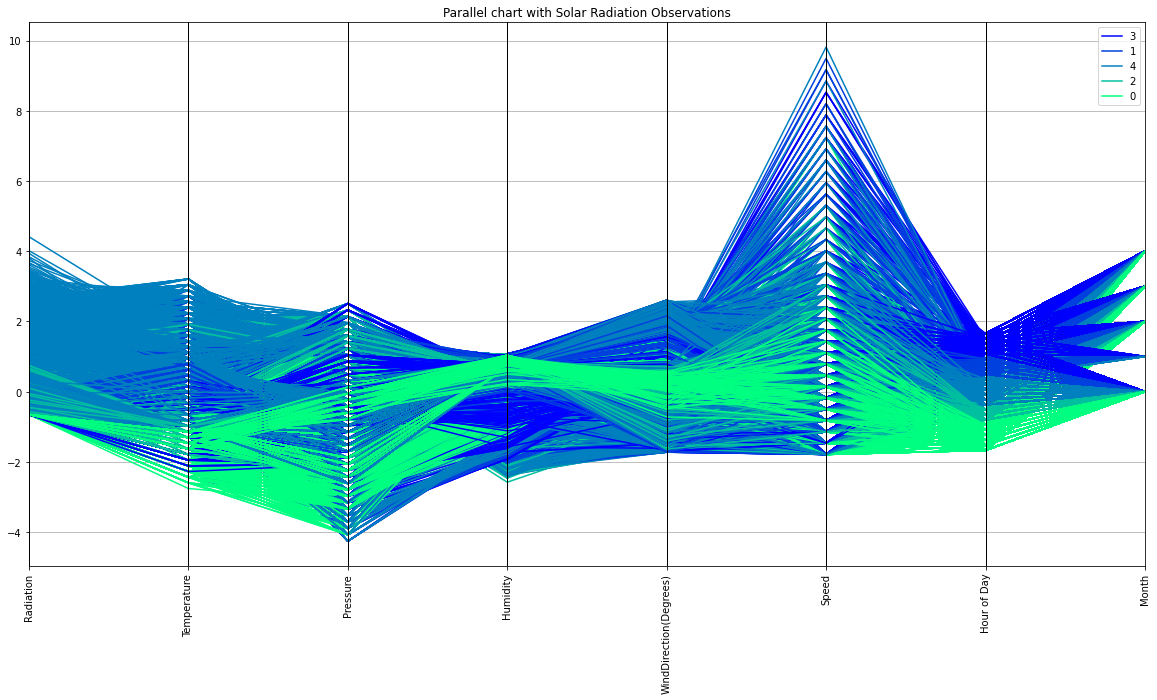

In [80]:

fig1 = plt.figure(figsize = (20,10))
pd.plotting.parallel_coordinates(sp9,
                                 'Hour Category',    # class_column
                                  colormap='winter'
                                  )
plt.xticks(rotation=90)
plt.title("Parallel chart with Solar Radiation Observations")

In [81]:
rng = np.random.default_rng()
nc_rand = pd.DataFrame(rng.normal(size = (32686,7)),
                       columns = sp9.columns[0:7]    # Assign column names, just like that
                       )
nc_rand['Hour of Day random'] = np.random.randint(4,   size= (32686, ))   # [0,1]
nc_rand['Month Random']        = np.random.randint(5,   size= (32686, ))   # [0,1]

In [82]:
sp9.shape

(32686, 9)

<AxesSubplot:>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Radiation'),
  Text(1, 0, 'Temperature'),
  Text(2, 0, 'Pressure'),
  Text(3, 0, 'Humidity'),
  Text(4, 0, 'WindDirection(Degrees)'),
  Text(5, 0, 'Speed'),
  Text(6, 0, 'Hour of Day'),
  Text(7, 0, 'Month Random')])

Text(0.5, 1.0, 'Parallel chart with random data')

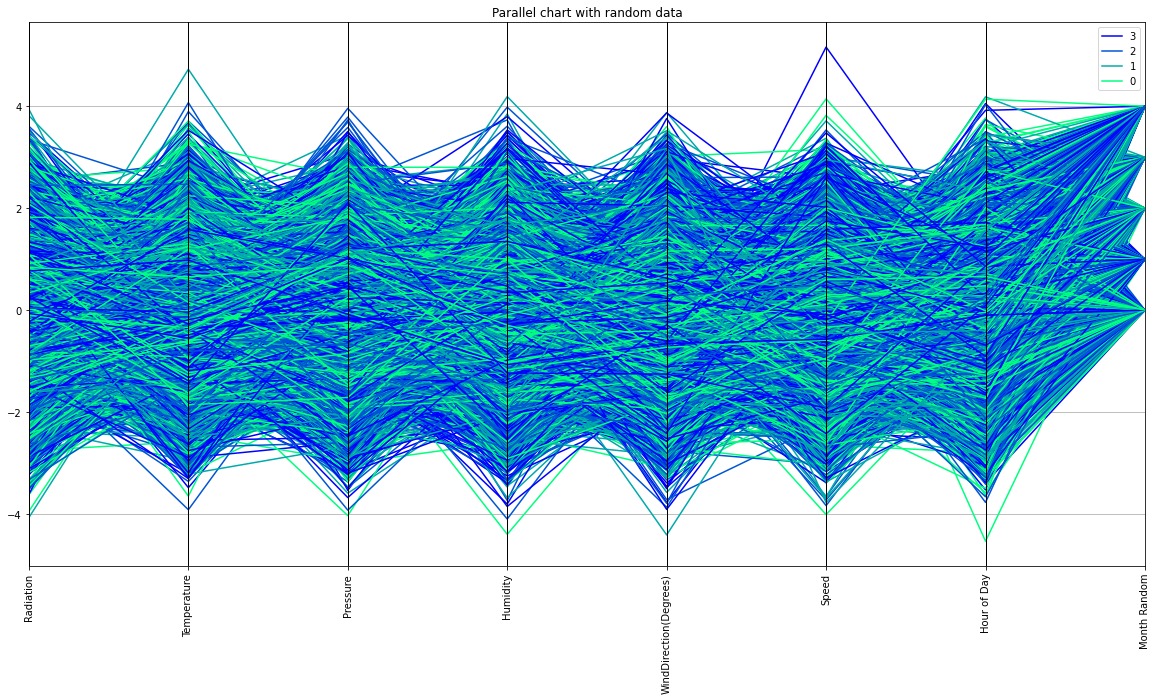

In [83]:
fig1 = plt.figure(figsize = (20,10))
pd.plotting.parallel_coordinates(nc_rand,
                                 'Hour of Day random',    # class_column
                                  colormap='winter'
                                  )

plt.xticks(rotation=90)
plt.title("Parallel chart with random data")

#### We find that "Month" also is related to different data observations which is unlike the one we see in the randomly generated data

In [84]:
sp9.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0  -0.651811    -0.500439  0.678974 -0.616253                0.407620   
1  -0.651811    -0.500439  0.678974 -0.654730                0.400285   
2  -0.651748    -0.500439  0.678974 -0.693206                0.183490   
3  -0.651811    -0.500439  0.678974 -0.577776               -0.069497   
4  -0.651938    -0.500439  0.678974 -0.500823               -0.463407   

      Speed  Hour of Day  Hour Category  Month  
0 -0.178738     1.655482              3      4  
1 -0.823359     1.655482              3      4  
2 -0.823359     1.655482              3      4  
3 -0.823359     1.655482              3      4  
4 -0.178738     1.655482              3      4

<AxesSubplot:>

Text(0.5, 1.0, 'Andrews plots with random data')

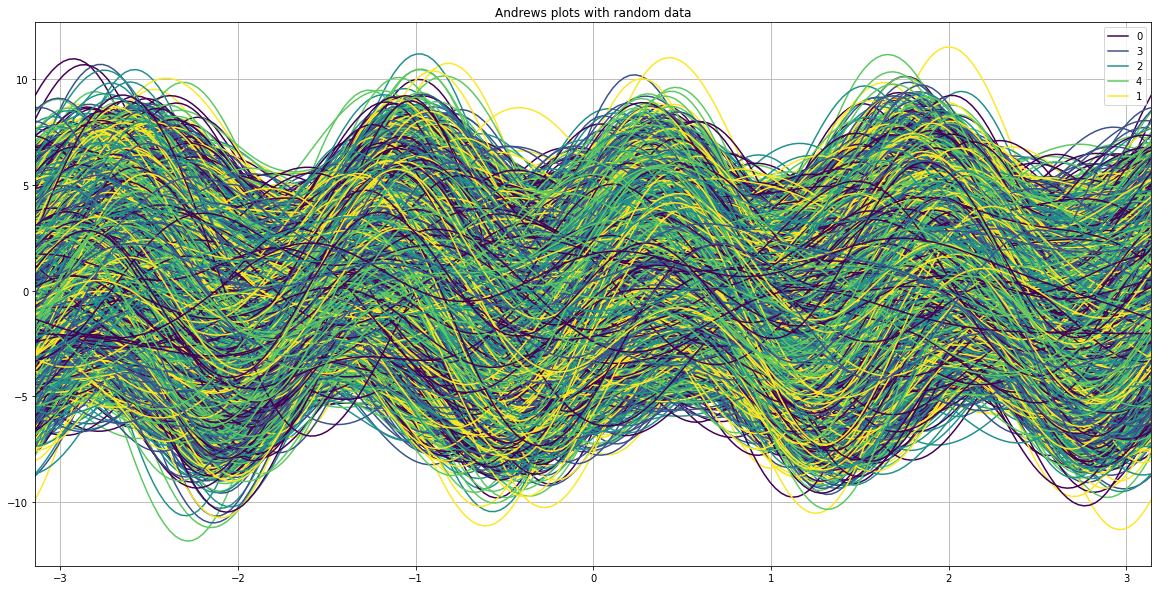

In [85]:
fig3 =  plt.figure(figsize = (20,10))
pd.plotting.andrews_curves(nc_rand,
                           'Month Random',
                           colormap = 'viridis')

plt.title("Andrews plots with random data")


<AxesSubplot:>

Text(0.5, 1.0, 'Andrews plots with Solar Radiation data')

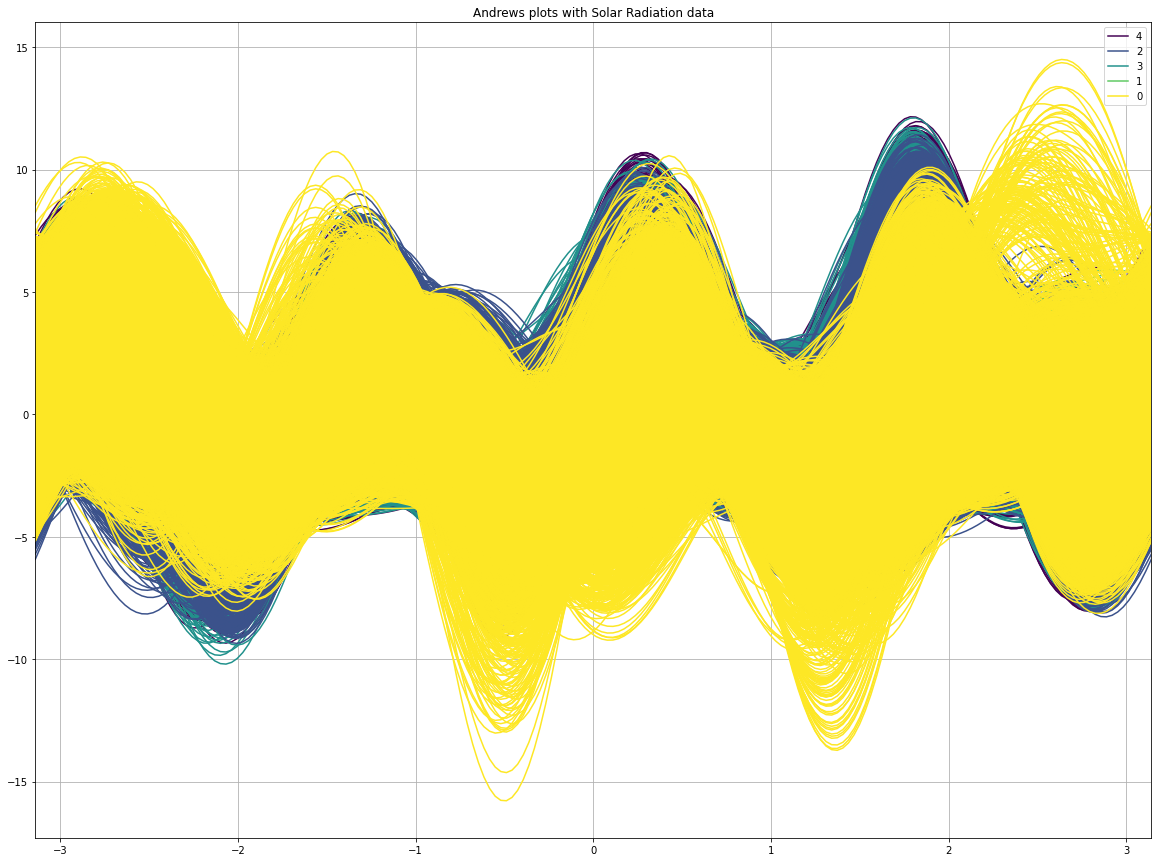

In [86]:
fig3 = plt.figure(figsize = (20,15))
pd.plotting.andrews_curves(sp9,
                           'Month', colormap = 'viridis')

plt.title("Andrews plots with Solar Radiation data")


#### We find that hour category is also has structure and the 0,4 category are closely related to Humidity

<AxesSubplot:>

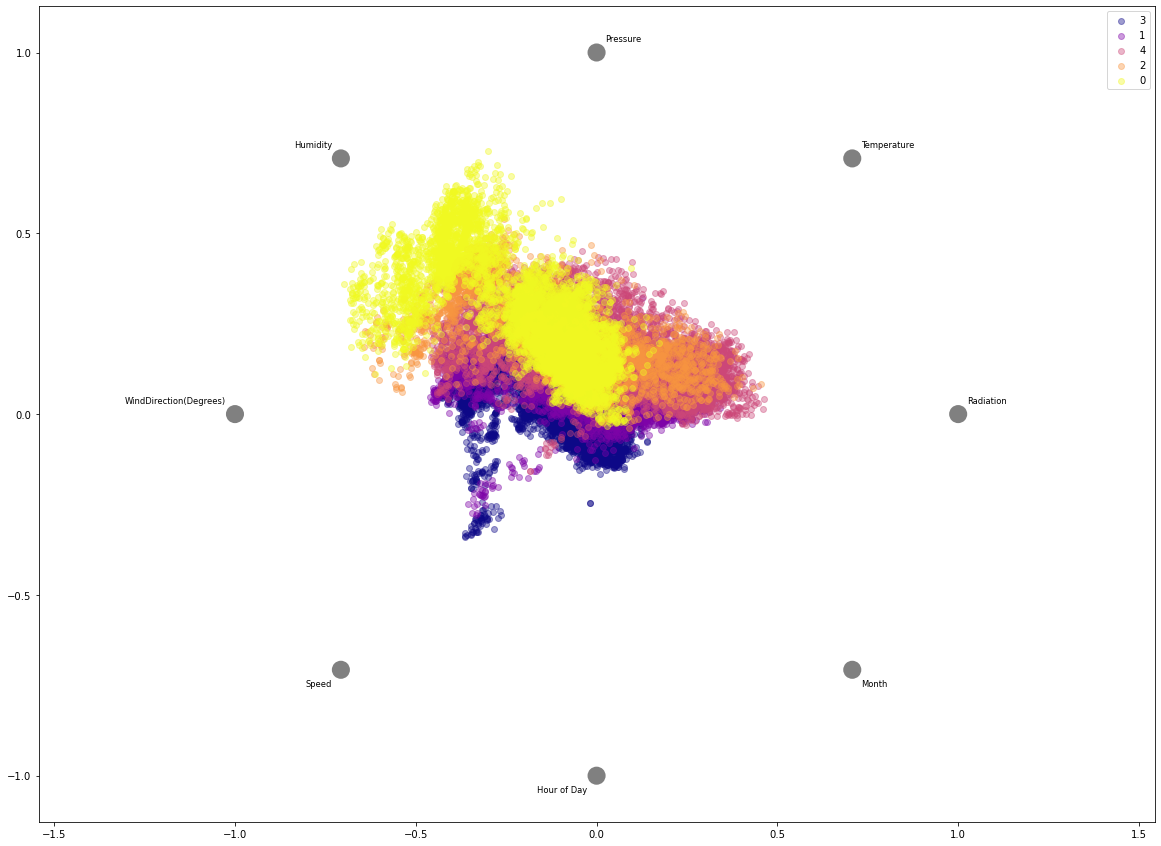

In [87]:
fig5 = plt.figure(figsize=(20, 15))
pd.plotting.radviz(sp9,
                   class_column ='Hour Category',
                   colormap= plt.cm.plasma,
                   alpha = 0.4
                   )


In [88]:
from sklearn.manifold import TSNE

E:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(32686, 2)

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

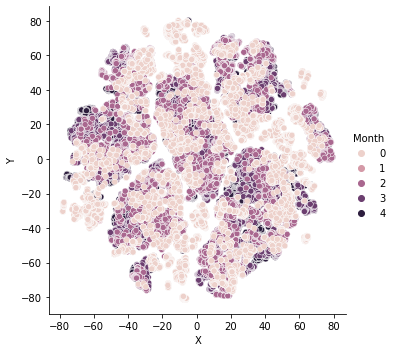

In [89]:
X_embedded = TSNE(n_components=2).fit_transform(sp9.iloc[:,:-1])
X_embedded.shape    
df = pd.DataFrame(X_embedded, columns=['X','Y'])

# 11.5.2 No two plots will be the same
 
plt.figure(figsize = (20,10))
sns.relplot(x = "X",
            y = "Y",
            hue = sp9.Month,    
            data = df
            )

In [90]:
sp8.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0  -0.651811    -0.500439  0.678974 -0.616253                0.407620   
1  -0.651811    -0.500439  0.678974 -0.654730                0.400285   
2  -0.651748    -0.500439  0.678974 -0.693206                0.183490   
3  -0.651811    -0.500439  0.678974 -0.577776               -0.069497   
4  -0.651938    -0.500439  0.678974 -0.500823               -0.463407   

      Speed  Hour of Day  Hour Category_12AM-6AM  Hour Category_6AM-9AM  \
0 -0.178738     1.655482                       0                      0   
1 -0.823359     1.655482                       0                      0   
2 -0.823359     1.655482                       0                      0   
3 -0.823359     1.655482                       0                      0   
4 -0.178738     1.655482                       0                      0   

   Hour Category_9AM-3PM  Hour Category_3PM-7PM  Hour Category_7PM-11:59PM  \
0                      0                      0                          1   
1                      0                      0                          1   
2                      0                      0                          1   
3                      0                      0                          1   
4                      0                      0                          1   

   Month_December  Month_January  Month_November  Month_October  \
0               0              0               0              0   
1               0              0               0              0   
2               0              0               0              0   
3               0              0               0              0   
4               0              0               0              0   

   Month_September  
0                1  
1                1  
2                1  
3                1  
4                1

In [91]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [92]:
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

In [93]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [94]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

from sklearn.inspection import permutation_importance

In [95]:
from scipy.stats import uniform

In [96]:
sp10 = sp.drop(sp.columns[[0, 1, 2,9,10,12,14]] , axis=1)

In [97]:
sp10

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
0           1.21           48     30.46        59                  177.39   
1           1.21           48     30.46        58                  176.78   
2           1.23           48     30.46        57                  158.75   
3           1.21           48     30.46        60                  137.71   
4           1.17           48     30.46        62                  104.95   
...          ...          ...       ...       ...                     ...   
32681       1.22           44     30.43       102                  145.42   
32682       1.17           44     30.42       102                  117.78   
32683       1.20           44     30.42       102                  145.19   
32684       1.23           44     30.42       101                  164.19   
32685       1.20           44     30.43       101                   83.59   

       Speed  Hour of Day Hour Category      Month  
0       5.62           23   7PM-11:59PM  September  
1       3.37           23   7PM-11:59PM  September  
2       3.37           23   7PM-11:59PM  September  
3       3.37           23   7PM-11:59PM  September  
4       5.62           23   7PM-11:59PM  September  
...      ...          ...           ...        ...  
32681   6.75            0      12AM-6AM   December  
32682   6.75            0      12AM-6AM   December  
32683   9.00            0      12AM-6AM   December  
32684   7.87            0      12AM-6AM   December  
32685   3.37            0      12AM-6AM   December  

[32686 rows x 9 columns]

In [98]:
sp10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Radiation               32686 non-null  float64 
 1   Temperature             32686 non-null  int64   
 2   Pressure                32686 non-null  float64 
 3   Humidity                32686 non-null  int64   
 4   WindDirection(Degrees)  32686 non-null  float64 
 5   Speed                   32686 non-null  float64 
 6   Hour of Day             32686 non-null  int64   
 7   Hour Category           32686 non-null  category
 8   Month                   32686 non-null  object  
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 2.0+ MB


In [99]:
num_cols = ['Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed','Hour of Day']
cat_cols = ['Hour Category', 'Month']

In [100]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [101]:
nc_pipe = Pipeline([ ('impute', SimpleImputer(strategy = 'median')), ('ss', StandardScaler()) ])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), ('ohe', OneHotEncoder())])

In [102]:
ct = ColumnTransformer([('nc_pipe',nc_pipe,num_cols),
                        ('cat_pipe', cat_pipe, cat_cols)])

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
pt = Pipeline([('ct', ct), ('dt', DecisionTreeRegressor())])

In [105]:
sp11 = sp.drop(sp.columns[[0, 1, 2,9,10,12,14]] , axis=1)

In [106]:
sp11.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   Hour of Day Hour Category      Month  
0           23   7PM-11:59PM  September  
1           23   7PM-11:59PM  September  
2           23   7PM-11:59PM  September  
3           23   7PM-11:59PM  September  
4           23   7PM-11:59PM  September

In [107]:
y_train = sp11.pop('Radiation')
X_train = sp11

In [108]:
y_train = pd.DataFrame(y_train)

In [109]:
pt.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Pressure',
                                                   'Humidity',
                                                   'WindDirection(Degrees)',
                                                   'Speed', 'Hour of Day']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Hour Category',
                                                   'Month'])])),
                ('dt', DecisionTreeRegressor())])

In [110]:
pt.predict(X_train)

array([1.21, 1.21, 1.23, ..., 1.2 , 1.23, 1.2 ])

In [111]:
from sklearn.neighbors import KNeighborsRegressor

In [112]:
pt2 = Pipeline([('ct', ct), ('kn', KNeighborsRegressor() )])

In [113]:
pt2.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Pressure',
                                                   'Humidity',
                                                   'WindDirection(Degrees)',
                                                   'Speed', 'Hour of Day']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Hour Category',
                                                   'Month'])])),
                ('kn', KNeighborsRegressor())])

In [114]:
pt2.predict(X_train)

array([[1.482],
       [1.226],
       [1.418],
       ...,
       [1.21 ],
       [1.21 ],
       [1.22 ]])

In [115]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()

In [116]:
pt3 = Pipeline([('ct', ct), ('lr', regr )])

In [117]:
pt3.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Pressure',
                                                   'Humidity',
                                                   'WindDirection(Degrees)',
                                                   'Speed', 'Hour of Day']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Hour Category',
                                                   'Month'])])),
                ('lr', LinearRegression())])

In [118]:
y_train

Radiation
0           1.21
1           1.21
2           1.23
3           1.21
4           1.17
...          ...
32681       1.22
32682       1.17
32683       1.20
32684       1.23
32685       1.20

[32686 rows x 1 columns]

In [119]:
sp11

Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0               48     30.46        59                  177.39   5.62   
1               48     30.46        58                  176.78   3.37   
2               48     30.46        57                  158.75   3.37   
3               48     30.46        60                  137.71   3.37   
4               48     30.46        62                  104.95   5.62   
...            ...       ...       ...                     ...    ...   
32681           44     30.43       102                  145.42   6.75   
32682           44     30.42       102                  117.78   6.75   
32683           44     30.42       102                  145.19   9.00   
32684           44     30.42       101                  164.19   7.87   
32685           44     30.43       101                   83.59   3.37   

       Hour of Day Hour Category      Month  
0               23   7PM-11:59PM  September  
1               23   7PM-11:59PM  September  
2               23   7PM-11:59PM  September  
3               23   7PM-11:59PM  September  
4               23   7PM-11:59PM  September  
...            ...           ...        ...  
32681            0      12AM-6AM   December  
32682            0      12AM-6AM   December  
32683            0      12AM-6AM   December  
32684            0      12AM-6AM   December  
32685            0      12AM-6AM   December  

[32686 rows x 8 columns]

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
sp.head()

UNIXTime                   Data                Time  Radiation  \
0  1475229326  9/29/2016 12:00:00 AM 1900-01-01 23:55:26       1.21   
1  1475229023  9/29/2016 12:00:00 AM 1900-01-01 23:50:23       1.21   
2  1475228726  9/29/2016 12:00:00 AM 1900-01-01 23:45:26       1.23   
3  1475228421  9/29/2016 12:00:00 AM 1900-01-01 23:40:21       1.21   
4  1475228124  9/29/2016 12:00:00 AM 1900-01-01 23:35:24       1.17   

   Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0           48     30.46        59                  177.39   5.62   
1           48     30.46        58                  176.78   3.37   
2           48     30.46        57                  158.75   3.37   
3           48     30.46        60                  137.71   3.37   
4           48     30.46        62                  104.95   5.62   

          TimeSunRise          TimeSunSet  Hour of Day  HS Hour Category  \
0 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
1 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
2 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
3 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   
4 1900-01-01 06:13:00 1900-01-01 18:13:00           23  23   7PM-11:59PM   

  Time of Observation      Month  
0 2016-09-30 09:55:26  September  
1 2016-09-30 09:50:23  September  
2 2016-09-30 09:45:26  September  
3 2016-09-30 09:40:21  September  
4 2016-09-30 09:35:24  September

In [122]:
y.head()

0    1.21
1    1.21
2    1.23
3    1.21
4    1.17
Name: Radiation, dtype: float64

In [123]:
sp20 = sp.drop(sp.columns[[0, 1, 2,9,10,12,14]] , axis=1)

In [124]:
sp20.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   Hour of Day Hour Category      Month  
0           23   7PM-11:59PM  September  
1           23   7PM-11:59PM  September  
2           23   7PM-11:59PM  September  
3           23   7PM-11:59PM  September  
4           23   7PM-11:59PM  September

In [147]:
from sklearn.preprocessing import OneHotEncoder

In [126]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [127]:
bins = [0,40,200,400,2000]
names = ['Negligible Irradiation', 'Low Irradiation', 'Average Irradiation','High Irradiation']
sp20['Radiation Amount'] = pd.cut(sp20["Radiation"], bins, labels=names)

In [128]:
sp20.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   Hour of Day Hour Category      Month        Radiation Amount  
0           23   7PM-11:59PM  September  Negligible Irradiation  
1           23   7PM-11:59PM  September  Negligible Irradiation  
2           23   7PM-11:59PM  September  Negligible Irradiation  
3           23   7PM-11:59PM  September  Negligible Irradiation  
4           23   7PM-11:59PM  September  Negligible Irradiation

In [132]:
sp20 = sp20.drop(sp20.columns[[0]], axis = 1)

In [133]:
sp20.head()

Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0           48     30.46        59                  177.39   5.62   
1           48     30.46        58                  176.78   3.37   
2           48     30.46        57                  158.75   3.37   
3           48     30.46        60                  137.71   3.37   
4           48     30.46        62                  104.95   5.62   

   Hour of Day Hour Category      Month        Radiation Amount  
0           23   7PM-11:59PM  September  Negligible Irradiation  
1           23   7PM-11:59PM  September  Negligible Irradiation  
2           23   7PM-11:59PM  September  Negligible Irradiation  
3           23   7PM-11:59PM  September  Negligible Irradiation  
4           23   7PM-11:59PM  September  Negligible Irradiation

In [134]:
num_d = sp20.select_dtypes(exclude=['object','category'])

# update the cols with their normalized values
sp20[num_d.columns] = sc.fit_transform(num_d)

In [135]:
cat_atr = ["Hour Category", "Month", "Radiation Amount"]

In [136]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sp20[cat_atr] = sp20[cat_atr].apply(le.fit_transform)

In [163]:
sp20.head()

Temperature  Pressure  Humidity  WindDirection(Degrees)     Speed  \
0    -0.500439  0.678974 -0.616253                0.407620 -0.178738   
1    -0.500439  0.678974 -0.654730                0.400285 -0.823359   
2    -0.500439  0.678974 -0.693206                0.183490 -0.823359   
3    -0.500439  0.678974 -0.577776               -0.069497 -0.823359   
4    -0.500439  0.678974 -0.500823               -0.463407 -0.178738   

   Hour of Day  Hour Category  Month  Radiation Amount  
0     1.655482              3      4                 3  
1     1.655482              3      4                 3  
2     1.655482              3      4                 3  
3     1.655482              3      4                 3  
4     1.655482              3      4                 3

In [208]:
y2 = sp20["Radiation Amount"]

In [209]:
y2

0        3
1        3
2        3
3        3
4        3
        ..
32681    3
32682    3
32683    3
32684    3
32685    3
Name: Radiation Amount, Length: 32686, dtype: int32

In [210]:
X2 = sp20.drop(["Radiation Amount"], axis = 1)

In [212]:
X2

Temperature  Pressure  Humidity  WindDirection(Degrees)     Speed  \
0        -0.500439  0.678974 -0.616253                0.407620 -0.178738   
1        -0.500439  0.678974 -0.654730                0.400285 -0.823359   
2        -0.500439  0.678974 -0.693206                0.183490 -0.823359   
3        -0.500439  0.678974 -0.577776               -0.069497 -0.823359   
4        -0.500439  0.678974 -0.500823               -0.463407 -0.178738   
...            ...       ...       ...                     ...       ...   
32681    -1.145490  0.130250  1.038241                0.023209  0.145006   
32682    -1.145490 -0.052658  1.038241               -0.309138  0.145006   
32683    -1.145490 -0.052658  1.038241                0.020443  0.789627   
32684    -1.145490 -0.052658  0.999764                0.248901  0.465884   
32685    -1.145490  0.130250  0.999764               -0.720242 -0.823359   

       Hour of Day  Hour Category  Month  
0         1.655482              3      4  
1         1.655482              3      4  
2         1.655482              3      4  
3         1.655482              3      4  
4         1.655482              3      4  
...            ...            ...    ...  
32681    -1.672098              0      0  
32682    -1.672098              0      0  
32683    -1.672098              0      0  
32684    -1.672098              0      0  
32685    -1.672098              0      0  

[32686 rows x 8 columns]

In [213]:
X2_train, X_test, y2_train, y_test = train_test_split(X2,
                                                    y2,
                                                    test_size=0.35,
                                                    shuffle = True,
                                                    stratify = y
                                                    )


X2_train.shape
X_test.shape
y2_train.shape
y_test.shape

(21245, 8)

(11441, 8)

(21245,)

(11441,)

In [214]:
steps_xg = [('sts', ss() ),
            ('pca', PCA()),
           
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

# 5.1  Instantiate Pipeline object

pipe_xg = Pipeline(steps_xg)

In [215]:
pipe_xg.get_params()

{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg',
   XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                 colsample_bynode=None, colsample_bytree=None,
                 enable_categorical=False, gamma=None, gpu_id=None,
                 importance_type=None, interaction_constraints=None,
                 learning_rate=None, max_delta_step=None, max_depth=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=3, num_parallel_tree=None,
                 predictor=None, random_state=None, reg_alpha=None,
                 reg_lambda=None, scale_pos_weight=None, silent=False,
                 subsample=None, tree_method=None, validate_parameters=None,
                 verbosity=None))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=Non

In [216]:
parameters = {'xg__learning_rate':  [0.03, 0.05], 
               'xg__max_depth':      [4,6],
              'pca__n_components' : [1,8]
               }               

In [217]:
clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [218]:
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X2_train, y2_train)
end = time.time()
print()
(end - start)/60 



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits


E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(
E:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:30:26] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:30:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None...
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      silent=False,
                                                      subsample=None,
                                                      tree_method=None,
                                                      validate_parameters=None,
                                                      verbosity=None))]),
             n_jobs=2,
             param_grid={'pca__n_components': [1, 8],
                         'xg__learning_rate': [0.03, 0.05],
                         'xg__max_depth': [4, 6]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

0.3568776528040568

In [219]:

f"Best parameter set {clf.best_params_}"

"Best parameter set {'pca__n_components': 1, 'xg__learning_rate': 0.03, 'xg__max_depth': 4}"

In [220]:
y_pred = clf.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

# 7.5 Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0             # 'Accuracy: 82.11165535218126'

# 7.6 Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)

--Few predictions--



array([1, 1, 3, 3])



--Accuracy Score--



68.14963726946945



--Confusion Matrix--



array([[   0,  185,    0,  795],
       [   0, 1406,    0, 1229],
       [   0,  102,    0,  947],
       [   0,  386,    0, 6391]], dtype=int64)

In [221]:
clf.best_estimator_.named_steps["xg"].feature_importances_.shape

# 7.9.1
print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_

(1,)



---Feature importances---



array([1.], dtype=float32)

In [224]:
colnames = X2.iloc[:,0:1].columns.tolist()

In [225]:
imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

# 7.10.1
df_imp

imp
Temperature  1.0

In [226]:

list(df_imp.index.values[:5])

['Temperature']